# Density Estimation

We will use this data to study whether or not the two brain regions are likely to be independent of each other and considering different types of political view For this question; you
can use the proper package for histogram and KDE; no need to write your own.
The data set n90pol.csv contains information on 90 university students who participated in
a psychological experiment designed to look for relationships between the size of different
regions of the brain and political views. The variables amygdala and acc indicate the volume
of two particular brain regions known to be involved in emotions and decision-making, the
amygdala and the anterior cingulate cortex; more exactly, these are residuals from the predicted volume, after adjusting for height, sex, and similar body-type variables. The variable
orientation gives the students’ locations on a five-point scale from 1 (very conservative) to 5
(very liberal). Note that in the dataset, we only have observations for orientation from 2 to
5.
Recall in this case, the kernel density estimator (KDE) for a density is given by
p(x) = 1
m
Xm
i=1
1
h
K

x
i − x
h

,
where x
i are two-dimensional vectors, h > 0 is the kernel bandwidth, based on the criterion
we discussed in lecture. For one-dimensional KDE, use a one-dimensional Gaussian kernel
K(x) = 1
√
2π
e
−x
2/2
.
For two-dimensional KDE, use a two-dimensional Gaussian kernel: for
x =

x1
x2

∈ R
2
,
where x1 and x2 are the two dimensions respectively
K(x) = 1
2π
e
−
(x1)
2+(x2)
2
2 .

In [30]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import time
import seaborn as sns
from scipy.stats import gaussian_kde

In [31]:
data = pd.read_csv('data/n90pol.csv')
data.head()

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5


###### Part 1

(a) Form the 1-dimensional histogram and KDE to estimate the distributions
of amygdala and acc, respectively. For this question, you can ignore the variable orientation. Decide on a suitable number of bins so you can see the shape of the distribution
2
clearly. Set an appropriate kernel bandwidth h > 0. For example. for one-dimensional
KDE, you are welcome to use a rule-of-thumb bandwidth estimator
h ≈ 1.06ˆσn−1/5
,
where n is the sample size, ˆσ is the standard error of samples; this is shown to be
optimal when Gaussian kernel functions are used for univariate data.

In [32]:
sigma = np.std(data['amygdala'])
n = len(data['amygdala'])
h = (n**(-1/5)) * sigma * 1.06
h

0.013973984566878187

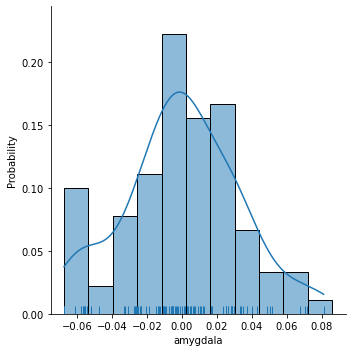

In [33]:
sns.displot(data['amygdala'], kde = True, stat = 'probability', rug = True, binwidth = h) #bw_adjust = .7)

<AxesSubplot:xlabel='amygdala', ylabel='Density'>

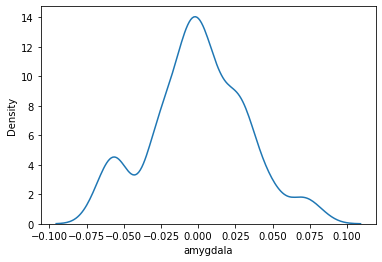

In [34]:
sns.kdeplot(data['amygdala'], bw_adjust = .7)

We used *h* for the bin width. The default bandwidth of the package is good--but we've also shown a slightly more contoured KDE as well in the second image.

###### Part 2

(b) Form 2-dimensional histogram for the pairs of variables (amygdala, acc).
Decide on a suitable number of bins so you can see the shape of the distribution clearly

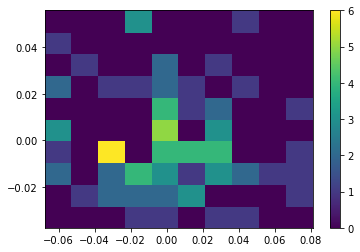

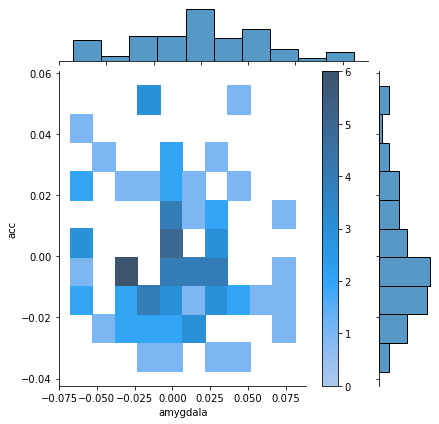

In [35]:
plt.hist2d(data['amygdala'], data['acc'], bins = (10,10))
plt.colorbar()
plt.show

sns.jointplot(data=data, x=data['amygdala'], y=data['acc'], kind="hist", cbar = True, bins = (10,10))

Done two different ways for fun.

###### Part 3

(c) Use kernel-density-estimation (KDE) to estimate the 2-dimensional density
function of (amygdala, acc) (this means for this question, you can ignore the variable
orientation). Set an appropriate kernel bandwidth h > 0.
Please show the two-dimensional KDE (e.g., two-dimensional heat-map, two-dimensional
contour plot, etc.)
Please explain based on the results, can you infer that the two variables (amygdala,
acc) are likely to be independent or not?

<AxesSubplot:xlabel='amygdala', ylabel='Density'>

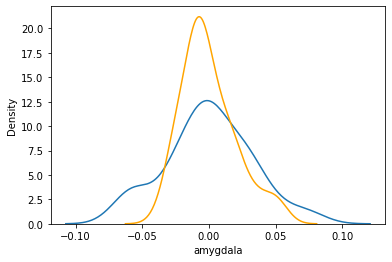

In [36]:
sns.kdeplot(data=data, x="amygdala")
sns.kdeplot(data=data, x="acc", color = "orange")

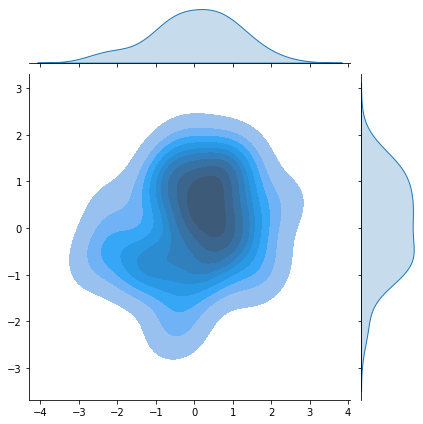

In [37]:
sns.jointplot(x=np.random.normal(size=50), y=np.random.normal(size=50), kind="kde", fill=True)

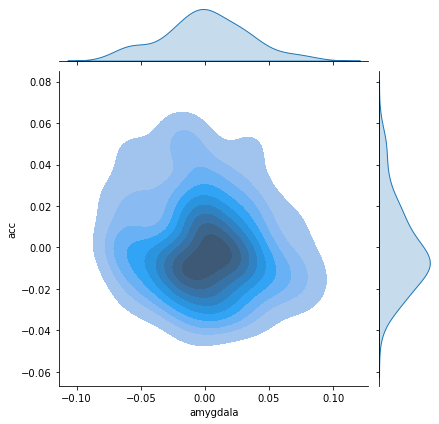

In [38]:
sns.jointplot(data=data, x=data['amygdala'], y=data['acc'], kind="kde", fill=True)

<AxesSubplot:>

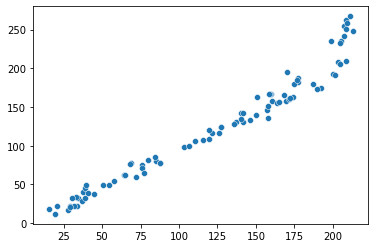

In [39]:
m1 = data['amygdala']
m2 = data['acc']

xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

kde1 = gaussian_kde(m1)
kde2 = gaussian_kde(m2)

xs = np.array([kde1.evaluate(i) for i in data['amygdala']])
ys = np.array([kde2.evaluate(i) for i in data['acc']])

X, Y = np.mgrid[xmin:xmax:90j, ymin:ymax:90j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = gaussian_kde(values)

xys = np.array([kernel.evaluate((m1[i], m2[i])) for i in range(0, len(values[0]))])
xtimesys = np.multiply(xs, ys)
Z = np.reshape(kernel(positions).T, X.shape)



# pdf1 = pd.DataFrame(xs)
# pdf2 = pd.DataFrame(ys)
# combo = pd.DataFrame([both.evaluate(i) for i in data['acc']])

# joint = pd.DataFrame(pdf1[0]*pdf2[0])

# sns.kdeplot(x = pdf1[0])
# sns.kdeplot(x = pdf2[0])
# sns.jointplot(x = comb[0], y = comb[1], kind = 'kde', fill=True)

# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
#           extent=[xmin, xmax, ymin, ymax])
# # ax.plot(m1, m2, 'k.', markersize=2)
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# plt.show()

# print(xtimesys)
# print(xys)
# print(m1[0:5])
# print(m2[0:5])

sns.scatterplot(x = [i[0] for i in xys], y = [i[0] for i in xtimesys])


Above we show the two independent KDEs, and then the 2 dimensional combined KDE. Given that the KDE has no specific shape, it looks like these two variables are nearly independent. 

To doubel check, we then do the actual math--we find the P(X) and P(Y), as well as P(X, Y), and then we plot P(X, Y) vs P(X)P(Y). If the varibales were entirely independent, then P(X, Y) would equal P(X)P(Y), meaning a straight diagonal line. So with this method we see that the variables are not independent entirely, but the points fall close to the line which emans they are nearly independent. 

Below we triple check by using the familair calculation of correlation (pearson's r), which shows a weak negative correlation of -0.13.

Correlation between amygdala and acc: -0.12848403204989117


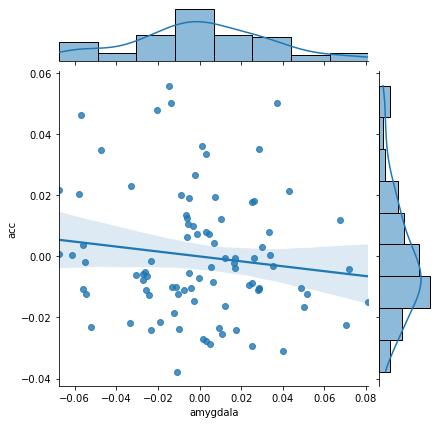

In [40]:
print(f"Correlation between amygdala and acc: {data['amygdala'].corr(data['acc'])}")
sns.jointplot(data=data, x=data['amygdala'], y=data['acc'], kind="reg")

###### Part 4

(d)  We will consider the variable orientation and consider conditional distributions. Please plot the estimated conditional distribution of amygdala conditioning
on political orientation: p(amygdala|orientation = c), c = 2, . . . , 5, using KDE. Set an
appropriate kernel bandwidth h > 0. Do the same for the volume of the acc: plot
p(acc|orientation = c), c = 2, . . . , 5 using KDE. (Note that the conditional distribution
can be understood as fitting a distribution for the data with the same orientation. Thus
you should plot 8 one-dimensional distribution functions in total for this question.)
Now please explain based on the results, can you infer that the conditional distribution
of amygdala and acc, respectively, are different from c = 2, . . . , 5? This is a type of
scientific question one could infer from the data: Whether or not there is a difference
between brain structure and political view.
Now please also fill out the conditional sample mean for the two variables:
c = 2 c = 3 c = 4 c = 5
amygdala
acc
Remark: As you can see this exercise, you can extract so much more information from
density estimation than simple summary statistics (e.g., the sample mean) in terms of
explorable data analysis.


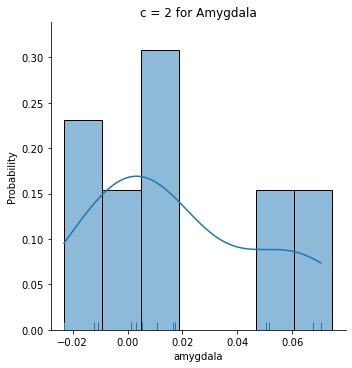

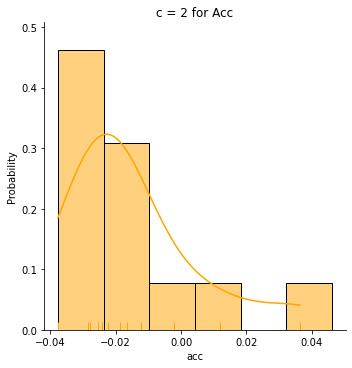

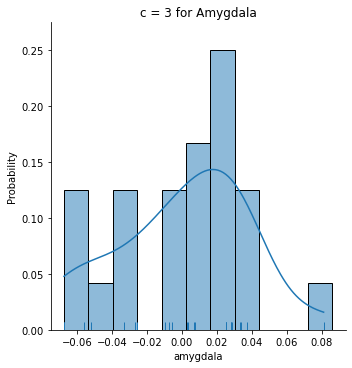

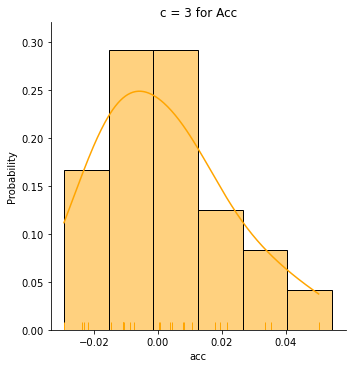

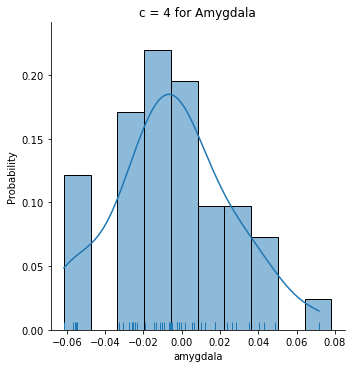

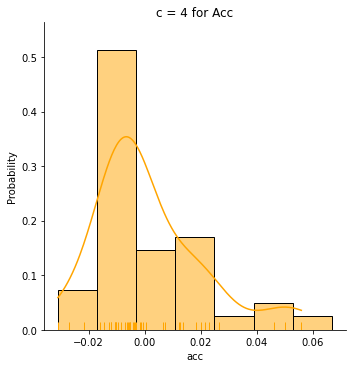

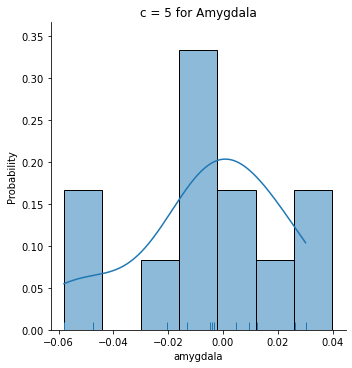

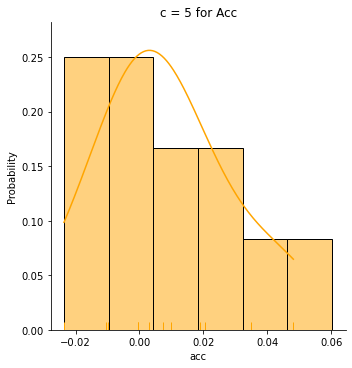

In [41]:
 for c in sorted(set(data['orientation'].values)):
    samp1 = data['amygdala'][data['orientation'] == c]
    samp2 = data['acc'][data['orientation'] == c]
    sigma1 = np.std(samp1)
    n1 = len(samp1)
    h1 = (n**(-1/5)) * sigma * 1.06
    sigma2 = np.std(samp2)
    n2 = len(samp2)
    h2 = (n**(-1/5)) * sigma * 1.06
    sns.displot(samp1, kde = True, stat = 'probability', rug = True, binwidth = h1
               ).set(title = f"c = {c} for Amygdala")
    sns.displot(samp2, kde = True, stat = 'probability', rug = True, binwidth = h2, color = "orange"
               ).set(title = f"c = {c} for Acc") 


From the individual kDE plots and the joint plots for each C, we can see that the distribution of amygdala and acc are different depending on orientation. I would caution that sample sizes at some C's are very small--however, with this intial data the researchers would be optimistic about the affect of Amygdala and Acc on Orientation.

Below is the table of means, which is much less informative than the KDE plots.

In [42]:
frame = [['amygdala'],['acc']]
for c in range(2,6):
    frame[0].append(data['amygdala'][data['orientation'] == c].mean())
    frame[1].append(data['acc'][data['orientation'] == c].mean())
    
means = pd.DataFrame(frame, columns = ["variable", "c=2", "c=3", "c=4", "c=5"])
means


,variable,c=2,c=3,c=4,c=5
0,amygdala,0.019062,0.000588,-0.00472,-0.005692
1,acc,-0.014769,0.001671,0.00131,0.008142


###### Part 5

(e) Again we will consider the variable orientation. We will estimate the conditional joint distribution of the volume of the amygdala and acc, conditioning on a
function of political orientation: p(amygdala, acc|orientation = c), c = 2, . . . , 5. You
3
will use two-dimensional KDE to achieve the goal; et an appropriate kernel bandwidth h > 0. Please show the two-dimensional KDE (e.g., two-dimensional heat-map,
two-dimensional contour plot, etc.).
Please explain based on the results, can you infer that the conditional distribution of
two variables (amygdala, acc) are different from c = 2, . . . , 5? This is a type of scientific
question one could infer from the data: Whether or not there is a difference between
brain structure and political view.


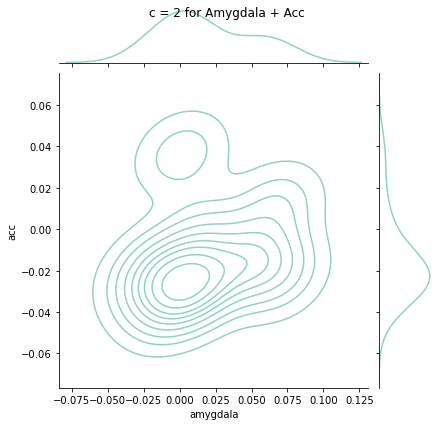

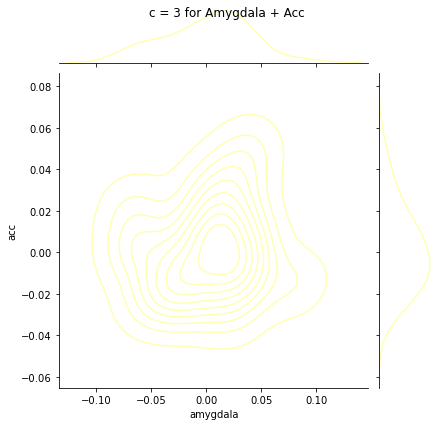

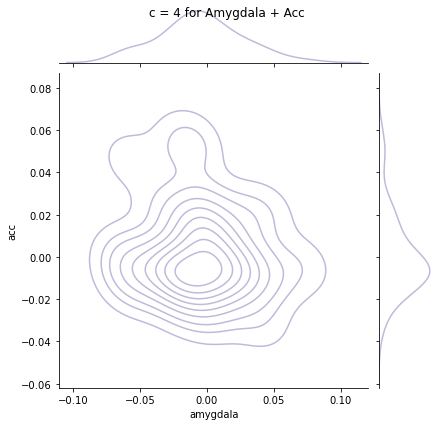

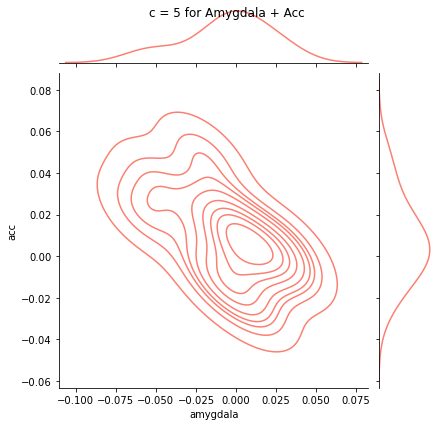

In [43]:
colorcounter = 0
for c in sorted(set(data['orientation'].values)):
    sns.jointplot(data=data, x=data['amygdala'][data['orientation'] == c], y=data['acc'][data['orientation'] == c], kind="kde",
                  color = sns.color_palette("Set3")[colorcounter]).fig.suptitle(f"c = {c} for Amygdala + Acc")
    #plt.title(f"c = {c} for Amygdala + Acc")
    colorcounter += 1

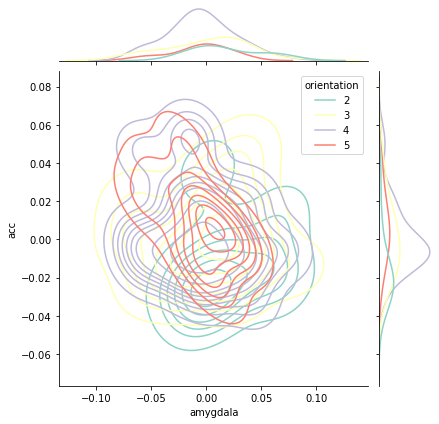

In [44]:
sns.jointplot(data=data, x=data['amygdala'], y=data['acc'], hue="orientation", kind="kde", palette = "Set3")

In this case, we can infer that the conditional joint distributions are different depending on orientation. The KDE's have very different shapes, and it is possible that there might even be a stronger dependency between the variables where orientation = 5.